In [ ]:
# ! Database name = Books_Database
# ! table 1 = Book
# ! table 2 = Description

In [1]:
import sqlite3 as sq
import pandas as pa
import db as DB
from matplotlib import pyplot as plt

In [2]:
# Making Database connection and storing data in Test file from csv file
connection = DB.connectDB("./Test")
cursor = DB.getCursor(connection)

#These two statements will be commented after running the code for the first time on a new system
DB.create_table_Description(cursor)
DB.create_table_Book(cursor)

# Reading data from csv file and storing panda's datframe
dataframe = pa.read_csv("./Book_Dataset_1.csv")

In [ ]:
# !datatypes of attributes
# id                     int64
# Title                 object
# Category              object
# Price                float64
# Price_After_Tax      float64
# Tax_amount             int64
# Avilability            int64
# Number_of_reviews      int64
# Book_Description      object
# Image_Link            object
# Stars                  int64

In [3]:
# !length of dataframe
size = dataframe.index  # 1000
# Picking all the values one by one from the dataframe and storing it in database
for x in size:
    Id = dataframe.loc[x].Id
    Title = dataframe.loc[x].Title
    Category = dataframe.loc[x].Category
    Price = dataframe.loc[x].Price
    Price_After_Tax = dataframe.loc[x].Price_After_Tax
    Tax_amount = dataframe.loc[x].Tax_amount
    Avilability = dataframe.loc[x].Avilability
    Number_of_reviews = dataframe.loc[x].Number_of_reviews
    Stars = dataframe.loc[x].Stars
    Book_Description = dataframe.loc[x].Book_Description

    # This piece of code will be commented after running for the first time on a new system
    cursor.execute('''
    INSERT INTO Description VALUES (?,?)
    ''', (int(Id), Book_Description))
    cursor.execute('''
    INSERT INTO Book VALUES (?,?,?,?,?,?,?,?,?,?)
    ''', (int(Id), Title, Category, float(Price), float(Price_After_Tax), float(Tax_amount), float(Avilability), float(Number_of_reviews), float(Stars), int(Id)))

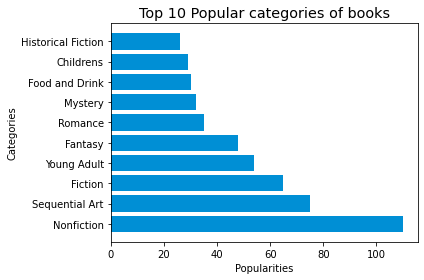

In [4]:
# GRAPH-1

#SQL query to get top ten categories of books
cursor.execute("""
SELECT COUNT(Category), Category 
FROM Book 
GROUP BY Category 
HAVING Category NOT IN ('Default', 'Add a comment') 
ORDER BY COUNT(Category) DESC 
LIMIT 10
""")

data = cursor.fetchall()
category = []
popularity = []

#Storing names of categories and popularities from the tuples obtained from the result of SQL query
for i in range(len(data)):
    temp = data[i]
    category.append(temp[1])

for i in range(len(data)):
    temp = data[i]
    popularity.append(temp[0])

# Making Bar chart    
plt.barh(category, popularity, color='#008fd5')
plt.style.use('ggplot')
plt.ylabel('Categories')
plt.xlabel('Popularities')
plt.title('Top 10 Popular categories of books')
plt.tight_layout()
plt.show()

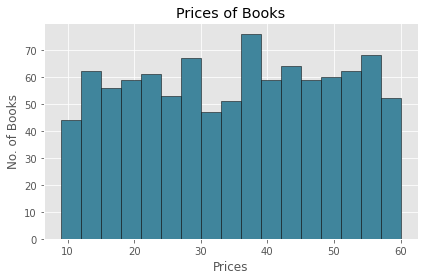

In [5]:
# GRAPH-2

# SQL query to get Prices of all the books
cursor.execute("""
SELECT Price
FROM Book
""")

data1 = cursor.fetchall()
prices = []

#Storing prices from the tuples obtained from the result of SQL query
for i in range(len(data1)):
    temp = data1[i]
    prices.append(temp[0])

bins = [9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60]

plt.style.use('ggplot')
plt.hist(prices, bins=bins, edgecolor='black', color='#40859c')
plt.title('Prices of Books')
plt.xlabel('Prices')
plt.ylabel('No. of Books')
plt.tight_layout()
plt.show()

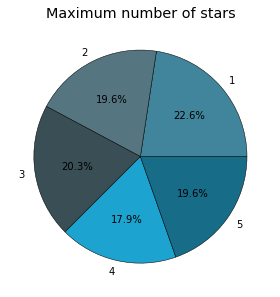

In [6]:
# GRAPH-3

# SQL query to get stars and total number of stars
cursor.execute(
"""
SELECT Stars, Count(Stars)
FROM Book
GROUP BY Stars
"""
)

data2 = cursor.fetchall()
stars = []
total_stars = []

#Storing stars and total number of stars in int form, from the tuples obtained from the result of SQL query
for i in range(len(data2)):
    temp = data2[i]
    stars.append(int(temp[0]))

for i in range(len(data2)):
    temp = data2[i]
    total_stars.append(int(temp[1]))

colors = ['#40859c', '#557580', '#394e55', '#1ca3cf', '#176c88']
plt.pie(total_stars, labels=stars, colors=colors, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.tight_layout()
plt.title('Maximum number of stars')
plt.show()

In [ ]:
connection.commit()
connection.close()